# ■ 日本腎・血液浄化AI学会主催「よくわかる寺子屋セミナー」

# 第4回「機械学習による回帰/分類問題」　演習プログラム

## □ 文責　学術委員会副委員長　岩藤和広

# 1. 環境設定

- MyDriveの中にTelakoya というフォルダーを作成し、その中に tela4 というフォルダーを作成する
- フォルダー tela4 の中に data というフォルダーと model というフォルダーを作る。
- https://github.com/kiwindow/telakoya をデスクトップなどにdownloadする。
- downloadしたファイルのうち、boston.csvとbreast.csvを、先ほど作成した data の中にuploadする。
- また、BinaryClassificationEvaluator.ipynbは Telakoya/tela4というフォルダーの中にuploadする。
- The4thTelakoyaMLが、今回の演習内容を示した本ファイル。

- 最初に、このnotebookをGoogle Driveにmountする。
- mount出来ると、左のサイドバーに drive というフォルダーが現れる。
- もし drive というフォルダーがなければ、次のセルを実行する。

In [ ]:
# Gogle driveにmountする
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# ライブラリの読み込み
import numpy as np  # 数値計算のライブラリ
import pandas as pd  # 表計算のライブラリ 
import matplotlib.pyplot as plt  # 図示のライブラリ
%matplotlib inline

# Excelの読み込みに必要だったライブラリは読み込み不要 (pd.read_excel(...) はpandasの読み込みのみで使用可)

# 2. 機械学習：回帰問題

## 1) Boston Housing: Training data と Test data に分割 (Hold-out法)

- 回帰問題とは、目的変数が連続変数のデータにおける予測問題。今回は公開データの「Boston Housing」のデータを利用する
- Boston Housingの説明変数を x 、目的変数を t とそれぞれ定義してから、以下の計算を行う。

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [ ]:
# boston.csvを読み込む
df = pd.read_csv('/content/drive/MyDrive/Telakoya/tela4/data/boston.csv')
df

In [ ]:
# 説明変数を x 、目的変数を t に代入。以後は(x, t)で使用してゆく。新たなデータを解析する場合も、同様に定義する。
x = df.iloc[:, :-1].values
t = df.iloc[:, -1].values

In [ ]:
# x と t の型を確認しておく。    (506, )とは、506個の要素を持つ横に長いベクトル(1行506列)を示す
print('x: ', x.shape)
print('t: ', t.shape)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 全データを学習データと検証データに分離する。test_size=0.3とすると、7 : 3の割合になる。random_stateは分離の仕方の乱数の指定で、任意の正の整数(1〜2^31)で指定できる
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

## 2) simple Linear regression (重回帰分析)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [ ]:
# 機械学習　回帰問題
#　① モデルの読み込み (モデルの設計図)
from sklearn.linear_model import LinearRegression
#　②　モデルのインスタンス化 (モデルの数値化)
model = LinearRegression()
# ③ モデルの学習 (モデルの最適化)
model.fit(x_train, t_train)

In [ ]:
# 検証 (テストデータでモデルの予測精度の検証)　　　決定係数 R^2の値が出力される　: 1に近いほど良い　　　(1-R^2を誤差という)
model.score(x_test, t_test)

In [ ]:
# 検証データの１例毎の予測値
pred = model.predict(x_test)
pred

In [ ]:
# 実測値
t_test

https://docs.python.org/ja/3/library/functions.html#enumerate

In [ ]:
# 予測値と実測値の書き出し (通常は特に必要ない)
for i, value in enumerate(pred):
    print('Predicted: {}    Observed: {}'.format(value, t_test[i]))

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
# 散布図で図示 (簡略)
plt.scatter(pred, t_test)

In [ ]:
# 散布図で図示 (詳細)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pred, t_test)
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
ax.set_aspect('equal')
plt.show()

## 3) 予測モデルの書き出しと読み込み

In [ ]:
# モデルの保存   pickle.dumpで保存する。　model を f というファイルで保存。wbとは、write binary file という意味。
import pickle
with open('/content/drive/MyDrive/Telakoya/tela4/model/boston.pickle', mode = 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# モデルの復元　　　　　pickle.loadで読み込む。f　というファイルを読み込んでいる。rbとは read binary file という意味。
with open('/content/drive/MyDrive/Telakoya/tela4/model/boston.pickle', mode = 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
# 復元したモデルによる予測
pred2 = model2.predict(x_test)
pred2

In [ ]:
# 先ほどの予測結果と一致していることの確認
pred == pred2

# 3. 機械学習：分類問題

## 1) Breast Cancer: Training data と Test data への分割 (Hold-out法)

- 分類問題とは、目的変数が離散変数のデータにおける予測問題。このため、公開データのうち「Breast Cancer」のデータを利用する
- Breast Cancer の説明変数を x で、目的変数を t でそれぞれ定義してから、以下の計算を行う。

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

- 分類問題では、説明変数を x　目的変数(教師データ)を t として定義する。
- 目的変数は 0 / 1 の2値にすると予測精度が上がりやすい。
- 1 を予測したい陽性症例、0 を陰性症例とする。
- 陽性症例と陰性症例の数が同じ程度であると予測精度が上がりやすい。
- 陽性症例の数が例えば10%以下と少ない場合、Imbalanced data といい、予測困難になりやすい。

In [ ]:
# breast.csvを読み込む
df = pd.read_csv('/content/drive/MyDrive/Telakoya/tela4/data/breast.csv')
df

In [ ]:
# 説明変数を x 、目的変数を t に代入。以後は(x, t)で使用してゆく。新たなデータを解析する場合も、同様に定義する。
x = df.iloc[:, :-1].values
t = df.iloc[:, -1].values

In [ ]:
# データを学習データと検証データに分離する。分離の割合は、test_size(0〜1)で指定。
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

https://seaborn.pydata.org/generated/seaborn.displot.html

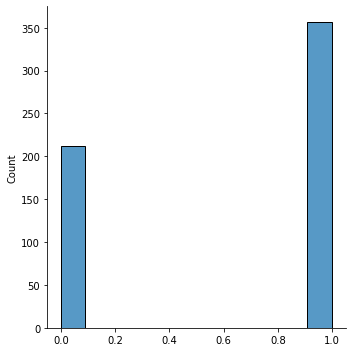

In [ ]:
# 目的変数の陽性症例と陰性症例の数を図示する
import seaborn as sns
sns.displot(t)

## ■ 2値分類を評価する関数 (予測値が実数の場合)

- 以下の showscores という関数を利用すると、2値分類において accuracy, precision, recall, f1-score, AUC of ROCなどが算出される
- trueval には、0 / 1 の教師データを、predval には、0〜1の予測値(実数)を入力する
- ROCのAUCやC-indexを算出するには、予測値が予測モデルから算出された実数(0〜1程度)の必要がある
- Pythonにおける混同行列の表記は[[TN, FP],[FN,TP]]となるが、本関数では[[TP, FP],[FN, TN]] とした。

In [ ]:
# 本関数での混同行列の表記
print(pd.DataFrame([['TP', 'FP'],['FN', 'TN']], index = ('予測(+)', '予測(-)'), columns=('実際(+)', '実際(-)')))

      実際(+) 実際(-)
予測(+)    TP    FP
予測(-)    FN    TN


In [ ]:
# Pythonでの混同行列の表記
print(pd.DataFrame([['TN', 'FP'],['FN', 'TP']], index = ('実際(-)', '実際(+)'), columns=('予測(-)', '予測(+)')))

      予測(-) 予測(+)
実際(-)    TN    FP
実際(+)    FN    TP


In [ ]:
# 2値分類の結果を評価する関数
def showscores(trueval, predval):
    # trueval: 検証データの観測値 (0 or 1), predval: 予測モデルによる予測値 (0〜1程度の実数)
    !pip install lifelines --quiet
    from lifelines.utils import concordance_index    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import roc_auc_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        try:
            ans = (val * p * 2 + 1) // 2 / p
        except:
            ans = 'N/A'
        return ans      

    # predintが整数の場合、AUCが低く出ることの警告文
    if np.array(predval).flatten()[0].is_integer():
        print('')
        print('◇ 予測値が整数であったため、ROCのAUC と C-index が実際よりも低値に出ることに注意。')
        print('')     
    else: 
        pass
    
    # 目的変数を整数にする
    round = [1 if p >= 0.5 else 0 for p in predval]   

    # 混同行列の作成
    cm = confusion_matrix(trueval, round)
    tn, fp, fn, tp = confusion_matrix(trueval, round).ravel()
    confmat = [[tp, fp], [fn, tn]]

    # 各種評価値の計算
    acc = accuracy_score(trueval, round)
    prec = precision_score(trueval, round)
    rec = recall_score(trueval, round)
    f1 = f1_score(trueval, round)
    spec = tn/(tn + fp)

    auc = roc_auc_score(trueval, predval)
    cind = concordance_index(trueval, predval)

    # 出力　: ( 1, Accuracy, 2. Precision 3. Recall 4. f1-score 5. Specificity, 6. AUCofROC, 7. C-index, 8. 混同行列)
    # res = np.array([acc, prec, rec, f1, spec, auc, cind, [[tp, fp], [fn, tn]] ])

    # ヒートマップ
    hm = sns.heatmap(confmat, annot=True, cmap='Blues')

    print('■ 2値分類の予測結果の評価')
    print('')
    print('□　検証データのサンプル数: ' + str(len(trueval)))
    print('')
    print('□　混同行列: ')
    print(pd.DataFrame(confmat,  index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False'] ))
    print('')
    print('   Accuracy(正解率): ' + str(my_round(acc,5)) + '   precision(精度): ' + str(my_round(prec,5)) + '    recall(再現率): ' + str(my_round(rec, 5)))
    print('   f1-score(f1値): ' + str(my_round(f1,5)) + '   specificity(特異度): ' + str(my_round(spec,5)))  
    print('')
    print('   AUC of ROC: ' + str(my_round(auc)) + '    C-index (c-Statistics): ' + str(my_round(cind,5)))
    print('')
    print('□　混同行列のヒートマップ:')
    plt.show()
    print('')

## ■ 2値分類を評価する関数 (予測値が整数 0/1 の場合)

- Pythonにおける混同行列の表記は[[TN, FP],[FN,TP]]となるが、本関数では[[TP, FP],[FN, TN]] とした。

In [ ]:
# 本関数での混同行列の表記
print(pd.DataFrame([['TP', 'FP'],['FN', 'TN']], index = ('予測(+)', '予測(-)'), columns=('実際(+)', '実際(-)')))

      実際(+) 実際(-)
予測(+)    TP    FP
予測(-)    FN    TN


In [ ]:
# Pythonでの混同行列の表記
print(pd.DataFrame([['TN', 'FP'],['FN', 'TP']], index = ('実際(-)', '実際(+)'), columns=('予測(-)', '予測(+)')))

      予測(-) 予測(+)
実際(-)    TN    FP
実際(+)    FN    TP


In [ ]:
def confusionmatrix(trueval, predint):
    # trueval: 検証データの観測値 (0 or 1), predint: 予測モデルによる予測値 (0 or 1)
    import matplotlib.pyplot as plt
    import seaborn as sns    
    from sklearn.metrics import confusion_matrix

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        try:
            ans = (val * p * 2 + 1) // 2 / p
        except:
            ans = 'N/A'
        return ans    

    # predintが実数の場合、整数に変換する
    if np.array(predint).flatten()[0].is_integer():
        pass
    else: 
        predint = [1 if p >= 0.5 else 0 for p in predint]
        print('')
        print('◇ 予測値が実数であったため、予測値は整数(0/1)に変換した。')
        print('')

    # 混同行列の作成
    TN, FP, FN, TP = confusion_matrix(trueval, predint).ravel()
    confmat = [[TP, FP], [FN, TN]] 

    # 各種評価値の計算
    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    # 出力　: ( 1, Accuracy, 2. Precision 3. Recall 4. f1-score 5. Specificity, 6. 混同行列)
    # res = np.array([acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]] ])

    # ヒートマップ
    hm = sns.heatmap(confmat, annot=True, cmap='Blues')    

    print('■ 2値分類の検定結果')
    print('')
    print('□　検証データのサンプル数: ' + str(len(trueval)) )
    print('')
    print('□　混同行列:')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')    
    print('   Accuracy(正解率): ' + str(my_round(acc,5)) + '   precision(精度): ' + str(my_round(prec,5)) + '    recall(再現率): ' + str(my_round(rec, 5)))
    print('   f1-score(f1値): ' + str(my_round(f1,5)) + '   specificity(特異度): ' + str(my_round(spec,5)))
    print('')
    print('□　混同行列のヒートマップ:')
    plt.show()
    print('')

## 2) simple Linear Regression (重回帰分析)

- LinearRegressionは予測値を実数で出力する。そのため、2値分類に利用するためには、出力を整数に変える必要がある。

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
#　機械学習　回帰問題
# ① モデルの読み込み (モデルの設計図)
from sklearn.linear_model import LinearRegression
# ② モデルのインスタンス化 (モデルの活性化)
model = LinearRegression()
# ③ モデルの学習 (モデルの最適化)
model.fit(x_train, t_train)

In [ ]:
# 予測値の算出 (実数で算出される)
pred = model.predict(x_test)
pred

In [ ]:
# 予測値は実数であるため、showscores関数で評価する。予測値が整数の場合は、confusionmatrixで評価する。
showscores(t_test, pred)